In [ ]:
## This file contains data about flights leaving from JKF ariport between Nov 2019-Dec-2020.
## Taxi-Out prediction has been an important concept as it helps in calculating Runway time and directly impact the cost of the flight.

# Predicting Taxi out Delay

In [3]:
## import libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB


In [4]:
## load flight dataset 

flights = pd.read_csv('flight_data.csv')

In [5]:
flights

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,...,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,...,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,...,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,...,38,96,N,6,0,30.18,Cloudy,19,23,13


In [6]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [7]:
flights.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


In [8]:
## using regex (regular expression) to remove things we don't want in the dataset like signs or new lines, etc

flights[['OP_UNIQUE_CARRIER', 'TAIL_NUM', 'DEST', 'Condition']] = flights[['OP_UNIQUE_CARRIER', 'TAIL_NUM', 'DEST', 'Condition']].replace(to_replace = r'[ABCDEFGHIJKLMNOPQRSTUVWXYZ]', value = float('NaN'), regex =True) # r'[^a-zA-Z]' a regular expression to remove text with a-z and A-Z from the data and replace it with NaN
flights.fillna(0, inplace=True) # filling NaN with 0 and inplace makes it permanent

In [9]:
flights

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,0.0,0.0,0.0,-1,124,636,324,...,34,58,W,25,38,29.86,0.0,9,17,14
1,11,1,5,0.0,0.0,0.0,-7,371,2475,340,...,34,58,W,25,38,29.86,0.0,9,17,15
2,11,1,5,0.0,0.0,0.0,40,181,1069,301,...,34,58,W,25,38,29.86,0.0,9,17,22
3,11,1,5,0.0,0.0,0.0,-2,168,944,345,...,34,58,W,25,38,29.86,0.0,9,17,12
4,11,1,5,0.0,0.0,0.0,-4,139,760,360,...,32,58,W,24,35,29.91,0.0,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,0.0,0.0,0.0,2,57,150,1370,...,38,96,N,6,0,30.18,0.0,20,32,19
28816,1,31,5,0.0,0.0,0.0,2,75,187,1390,...,38,96,N,6,0,30.18,0.0,19,23,22
28817,1,31,5,0.0,0.0,0.0,283,392,2422,1125,...,38,96,N,6,0,30.18,0.0,19,23,21
28818,1,31,5,0.0,0.0,0.0,5,224,1598,1417,...,38,96,N,6,0,30.18,0.0,19,23,13


In [10]:
## change wind to degrees

flights[['Wind']] = flights[['Wind']].replace(to_replace = r'[N]', value = float(360), regex =True) 
flights[['Wind']] = flights[['Wind']].replace(to_replace = r'[E]', value = float(90), regex =True) 
flights[['Wind']] = flights[['Wind']].replace(to_replace = r'[S]', value = float(180), regex =True) 
flights[['Wind']] = flights[['Wind']].replace(to_replace = r'[W]', value = float(270), regex =True) 

flights[['Wind']] = flights[['Wind']].replace(to_replace = r'[NW]', value = float(315), regex =True) 
flights[['Wind']] = flights[['Wind']].replace(to_replace = r'[NE]', value = float(45), regex =True) 
flights[['Wind']] = flights[['Wind']].replace(to_replace = r'[NNW]', value = float(335), regex =True) 
flights[['Wind']] = flights[['Wind']].replace(to_replace = r'[NNE]', value = float(25), regex =True) 
flights[['Wind']] = flights[['Wind']].replace(to_replace = r'[ENE]', value = float(65), regex =True) 
flights[['Wind']] = flights[['Wind']].replace(to_replace = r'[WNW]', value = float(295), regex =True) 

flights[['Wind']] = flights[['Wind']].replace(to_replace = r'[SE]', value = float(135), regex =True) 
flights[['Wind']] = flights[['Wind']].replace(to_replace = r'[SW]', value = float(225), regex =True) 
flights[['Wind']] = flights[['Wind']].replace(to_replace = r'[SSE]', value = float(155), regex =True) 
flights[['Wind']] = flights[['Wind']].replace(to_replace = r'[SSW]', value = float(205), regex =True) 
flights[['Wind']] = flights[['Wind']].replace(to_replace = r'[ESE]', value = float(115), regex =True) 
flights[['Wind']] = flights[['Wind']].replace(to_replace = r'[WSW]', value = float(245), regex =True) 

flights[['Wind']] = flights[['Wind']].replace(to_replace = r'[CALM]', value = float(245), regex =True) 
flights[['Wind']] = flights[['Wind']].replace(to_replace = r'[FAIR]', value = float(245), regex =True) 



In [11]:
flights

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,0.0,0.0,0.0,-1,124,636,324,...,34,58,270.0,25,38,29.86,0.0,9,17,14
1,11,1,5,0.0,0.0,0.0,-7,371,2475,340,...,34,58,270.0,25,38,29.86,0.0,9,17,15
2,11,1,5,0.0,0.0,0.0,40,181,1069,301,...,34,58,270.0,25,38,29.86,0.0,9,17,22
3,11,1,5,0.0,0.0,0.0,-2,168,944,345,...,34,58,270.0,25,38,29.86,0.0,9,17,12
4,11,1,5,0.0,0.0,0.0,-4,139,760,360,...,32,58,270.0,24,35,29.91,0.0,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,0.0,0.0,0.0,2,57,150,1370,...,38,96,360.0,6,0,30.18,0.0,20,32,19
28816,1,31,5,0.0,0.0,0.0,2,75,187,1390,...,38,96,360.0,6,0,30.18,0.0,19,23,22
28817,1,31,5,0.0,0.0,0.0,283,392,2422,1125,...,38,96,360.0,6,0,30.18,0.0,19,23,21
28818,1,31,5,0.0,0.0,0.0,5,224,1598,1417,...,38,96,360.0,6,0,30.18,0.0,19,23,13


In [12]:
## Error because some columns would not convert to integer, there are still strings instead of NaN in the columns
## Drop columns

flights = flights.drop(columns= ['OP_UNIQUE_CARRIER', 'TAIL_NUM', 'DEST', 'Condition'])

In [13]:
flights

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,-1,124,636,324,323,448,48,34,58,270.0,25,38,29.86,9,17,14
1,11,1,5,-7,371,2475,340,333,531,48,34,58,270.0,25,38,29.86,9,17,15
2,11,1,5,40,181,1069,301,341,482,48,34,58,270.0,25,38,29.86,9,17,22
3,11,1,5,-2,168,944,345,343,513,48,34,58,270.0,25,38,29.86,9,17,12
4,11,1,5,-4,139,760,360,356,499,46,32,58,270.0,24,35,29.91,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,2,57,150,1370,1372,1427,39,38,96,360.0,6,0,30.18,20,32,19
28816,1,31,5,2,75,187,1390,1392,25,39,38,96,360.0,6,0,30.18,19,23,22
28817,1,31,5,283,392,2422,1125,1408,1337,39,38,96,360.0,6,0,30.18,19,23,21
28818,1,31,5,5,224,1598,1417,1422,261,39,38,96,360.0,6,0,30.18,19,23,13


In [14]:
flights = flights.astype(int)

In [15]:
flights

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,-1,124,636,324,323,448,48,34,58,270,25,38,29,9,17,14
1,11,1,5,-7,371,2475,340,333,531,48,34,58,270,25,38,29,9,17,15
2,11,1,5,40,181,1069,301,341,482,48,34,58,270,25,38,29,9,17,22
3,11,1,5,-2,168,944,345,343,513,48,34,58,270,25,38,29,9,17,12
4,11,1,5,-4,139,760,360,356,499,46,32,58,270,24,35,29,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,2,57,150,1370,1372,1427,39,38,96,360,6,0,30,20,32,19
28816,1,31,5,2,75,187,1390,1392,25,39,38,96,360,6,0,30,19,23,22
28817,1,31,5,283,392,2422,1125,1408,1337,39,38,96,360,6,0,30,19,23,21
28818,1,31,5,5,224,1598,1417,1422,261,39,38,96,360,6,0,30,19,23,13


In [16]:
# data type should be int

flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   MONTH             28820 non-null  int64
 1   DAY_OF_MONTH      28820 non-null  int64
 2   DAY_OF_WEEK       28820 non-null  int64
 3   DEP_DELAY         28820 non-null  int64
 4   CRS_ELAPSED_TIME  28820 non-null  int64
 5   DISTANCE          28820 non-null  int64
 6   CRS_DEP_M         28820 non-null  int64
 7   DEP_TIME_M        28820 non-null  int64
 8   CRS_ARR_M         28820 non-null  int64
 9   Temperature       28820 non-null  int64
 10  Dew Point         28820 non-null  int64
 11  Humidity          28820 non-null  int64
 12  Wind              28820 non-null  int64
 13  Wind Speed        28820 non-null  int64
 14  Wind Gust         28820 non-null  int64
 15  Pressure          28820 non-null  int64
 16  sch_dep           28820 non-null  int64
 17  sch_arr           28820 non-nul

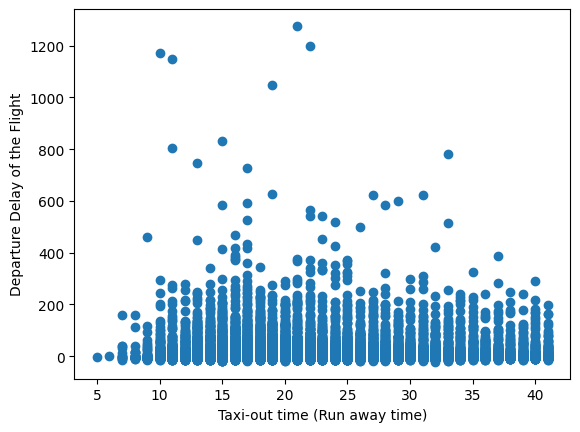

In [17]:
## exploratory data analysis

## create a scatter plot of the relationship between the features and the response
## scatter plot for Taxi Out vs Departure delay of the flight

plt.scatter(flights['TAXI_OUT'], flights['DEP_DELAY'])
plt.xlabel('Taxi-out time (Run away time)')
plt.ylabel('Departure Delay of the Flight')
plt.show()

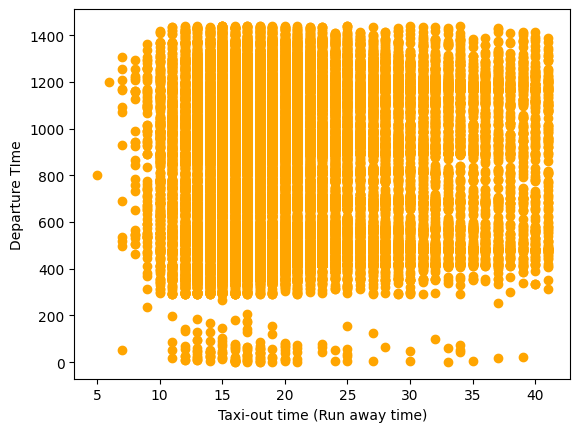

In [43]:
## scatter plot for Distance of the flight vs Departure delay of the flight

plt.scatter(flights['TAXI_OUT'], flights['DEP_TIME_M'], color = 'orange')
plt.xlabel('Taxi-out time (Run away time)')
plt.ylabel('Departure TIme')
plt.show()

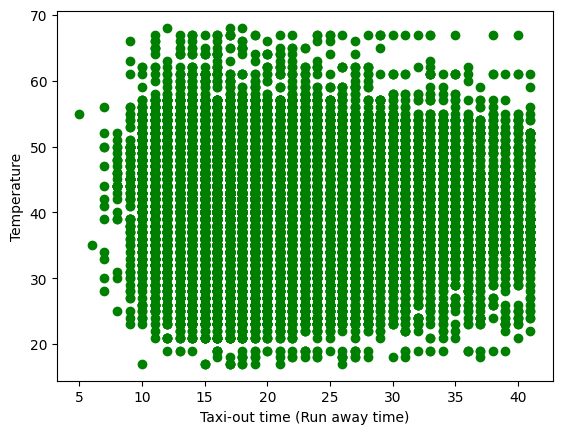

In [19]:
## scatter plot for TAXI_OUT vs Temperature

plt.scatter(flights['TAXI_OUT'], flights['Temperature'], color = 'green')
plt.xlabel('Taxi-out time (Run away time)')
plt.ylabel('Temperature')
plt.show()

In [20]:
## correlation matrix

columns = ['DEP_DELAY','DISTANCE', 'Temperature', 'Humidity', 'Wind', 'Wind Speed', 'Pressure','TAXI_OUT'] 
corr_matrix = flights[columns].corr()
corr_matrix

,DEP_DELAY,DISTANCE,Temperature,Humidity,Wind,Wind Speed,Pressure,TAXI_OUT
DEP_DELAY,1.000000,-0.031507,-0.032261,-0.011776,0.022416,0.067718,-0.052771,0.034881
DISTANCE,-0.031507,1.000000,-0.009923,0.015110,-0.004254,-0.010734,0.005371,0.059856
Temperature,-0.032261,-0.009923,1.000000,0.054401,-0.383981,0.010603,-0.168166,-0.067574
Humidity,-0.011776,0.015110,0.054401,1.000000,-0.211709,-0.110274,0.031618,-0.026826
Wind,0.022416,-0.004254,-0.383981,-0.211709,1.000000,0.314103,-0.001302,0.038427
Wind Speed,0.067718,-0.010734,0.010603,-0.110274,0.314103,1.000000,-0.300539,0.062522
Pressure,-0.052771,0.005371,-0.168166,0.031618,-0.001302,-0.300539,1.000000,-0.069730
TAXI_OUT,0.034881,0.059856,-0.067574,-0.026826,0.038427,0.062522,-0.069730,1.000000


<AxesSubplot: >

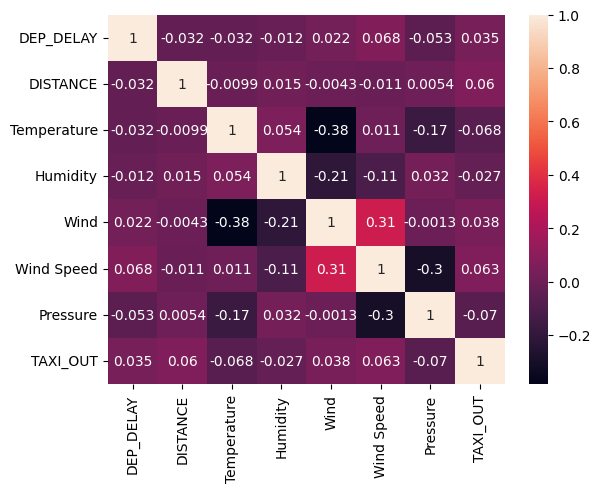

In [21]:
## heatmap 

sns.heatmap(corr_matrix, annot=True)

In [36]:
corr_matrix_all = flights.corr()
corr_matrix_all

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
MONTH,1.000000,-0.007254,0.029365,0.046455,-0.016052,-0.000144,0.001824,0.002632,-0.012361,0.135682,0.135040,0.012515,0.016746,-0.035097,-0.051014,0.050261,-0.006191,-0.019705,0.018505
DAY_OF_MONTH,-0.007254,1.000000,-0.029732,-0.036618,0.002761,-0.002762,0.001754,0.004446,0.008519,-0.132457,-0.040129,0.096215,0.069623,-0.093211,-0.088991,0.064684,-0.003417,0.002223,-0.023990
DAY_OF_WEEK,0.029365,-0.029732,1.000000,-0.006203,0.000413,0.002450,0.005411,0.008256,-0.003339,0.013081,-0.073816,0.001627,0.002837,0.095943,0.127689,0.148685,0.024415,0.009621,0.028388
DEP_DELAY,0.046455,-0.036618,-0.006203,1.000000,-0.030871,-0.031507,0.102384,0.072340,0.043691,-0.032261,-0.000013,-0.011776,0.022416,0.067718,0.044340,-0.052771,-0.065452,-0.006949,0.034881
CRS_ELAPSED_TIME,-0.016052,0.002761,0.000413,-0.030871,1.000000,0.994465,-0.031332,-0.021391,0.035186,-0.016050,0.007246,0.017198,-0.007432,-0.013440,-0.011934,0.005848,0.083426,-0.067669,0.070838
DISTANCE,-0.000144,-0.002762,0.002450,-0.031507,0.994465,1.000000,-0.040963,-0.034604,0.008520,-0.009923,0.009789,0.015110,-0.004254,-0.010734,-0.009522,0.005371,0.059174,-0.088793,0.059856
CRS_DEP_M,0.001824,0.001754,0.005411,0.102384,-0.031332,-0.040963,1.000000,0.946023,0.452476,0.086371,0.001578,0.003843,-0.031616,0.008063,-0.009887,0.032666,-0.025621,0.495286,0.044864
DEP_TIME_M,0.002632,0.004446,0.008256,0.072340,-0.021391,-0.034604,0.946023,1.000000,0.469758,0.098105,0.008907,-0.005923,-0.039849,0.006033,-0.014336,0.029969,0.025609,0.544197,0.057896
CRS_ARR_M,-0.012361,0.008519,-0.003339,0.043691,0.035186,0.008520,0.452476,0.469758,1.000000,0.101620,-0.000442,-0.033163,-0.071293,0.014180,0.004486,0.009120,0.149903,0.424209,0.071377
Temperature,0.135682,-0.132457,0.013081,-0.032261,-0.016050,-0.009923,0.086371,0.098105,0.101620,1.000000,0.787864,0.054401,-0.383981,0.010603,-0.039487,-0.168166,-0.022534,0.075958,-0.067574


<AxesSubplot: >

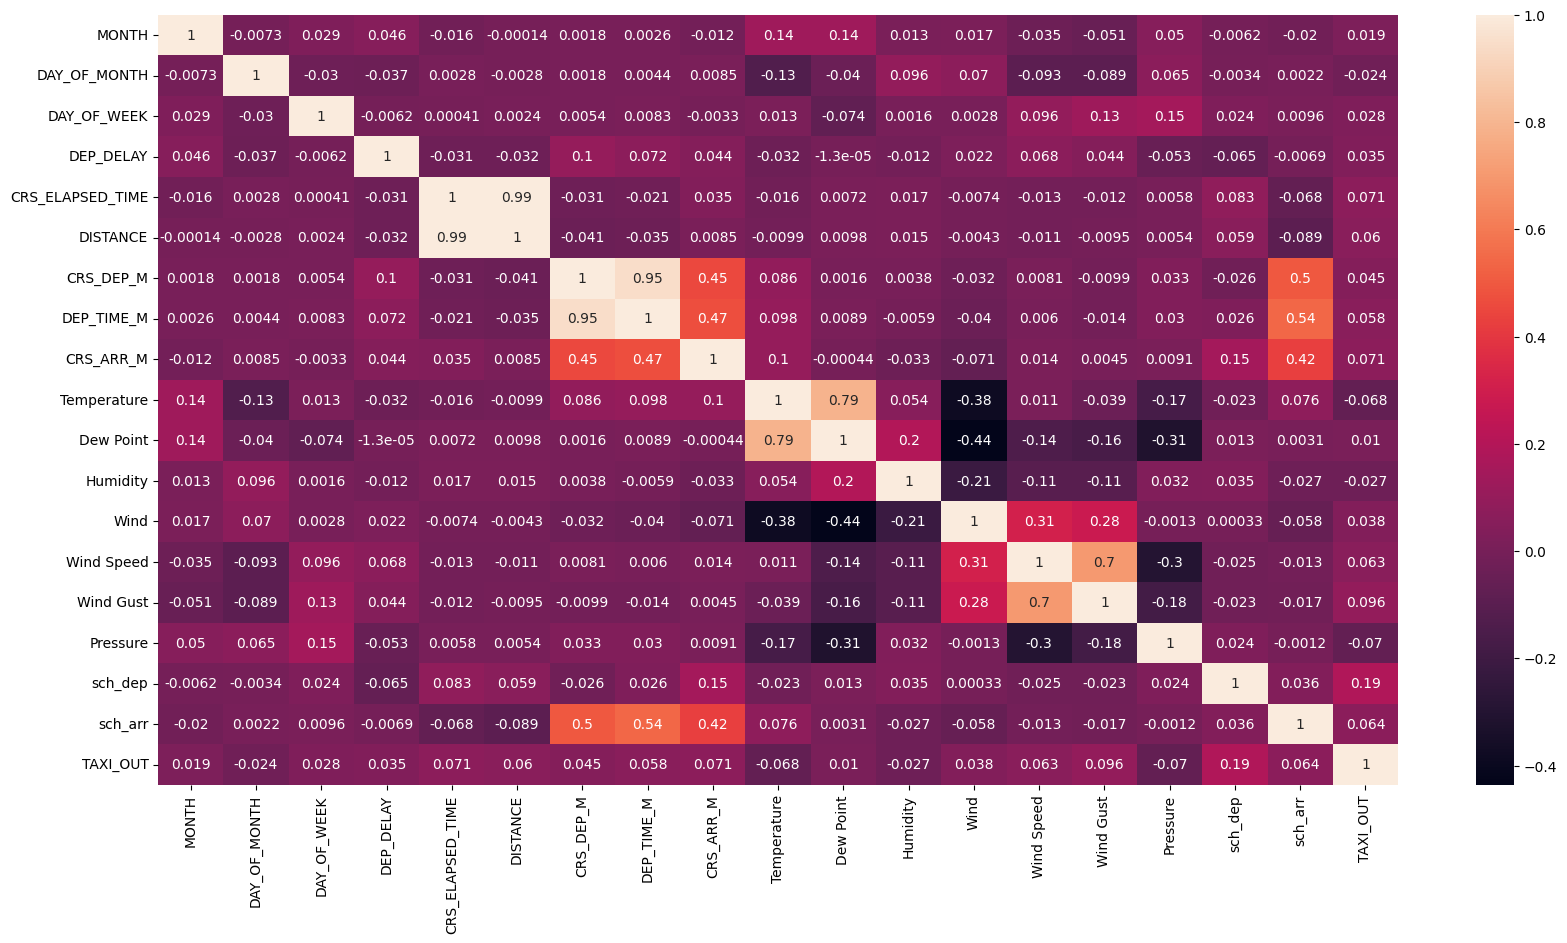

In [39]:
## heatmap 

plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix_all, annot=True)

In [22]:
## split the data into independent and dependent variables (x and y) 
## selecting only the last column as Y

X = flights.iloc[:,:-1].values
Y = flights.iloc[:,-1].values

In [23]:
## train, test and split data by testing 40%

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4, random_state=32)

In [25]:
X_train

array([[ 1, 30,  4, ..., 30, 30, 38],
       [11, 29,  5, ..., 30, 21, 29],
       [12, 19,  4, ..., 30, 39, 35],
       ...,
       [11, 30,  6, ..., 30, 19, 22],
       [12,  1,  7, ..., 30, 11, 24],
       [12,  5,  4, ..., 30, 27, 33]])

In [26]:
Y_train

array([14, 14, 27, ..., 20, 16, 26])

In [27]:
## linear regression

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [28]:
## make predictions

pred_lin = lin_reg.predict(X_test)

In [29]:
## create a dataframe for predictions

pd.DataFrame({'Actual':Y_test, 'Predicted':pred_lin})

,Actual,Predicted
0,23,22.358654
1,14,22.419657
2,22,22.851536
3,19,24.464795
4,20,18.579252
...,...,...
11523,18,18.880043
11524,22,22.519430
11525,20,22.050397
11526,12,19.684110


In [30]:
## model evaluation
# MAE Mean Absolute Error - average error between the actual and the predicted
# MSE Mean Square Error - average of the squared differences between predicted value and actual value
# RMSE Root Mean Square Error - square root of the average of the squared differenced between the predicted value and actual value
# R2 - R Squared - measures the variation/changes in the target variable (used to determine if model has done well: R2 value is between 0-1, the higher R2 means done well)

print('MAE:', metrics.mean_absolute_error(Y_test,pred_lin))
print('MSE:', metrics.mean_squared_error(Y_test,pred_lin))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test,pred_lin)))
print('R2:', metrics.r2_score(Y_test,pred_lin))

MAE: 5.221308004602557
MSE: 43.182386104547916
RMSE: 6.571330619025946
R2: 0.08123560159449361


In [31]:
## train, test and split data by testing 20%

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=32)

In [32]:
## linear regression

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [33]:
pred_lin2 = lin_reg.predict(X_test)

In [34]:
## create a dataframe for predictions

pd.DataFrame({'Actual':Y_test, 'Predicted':pred_lin2})

,Actual,Predicted
0,23,22.350699
1,14,22.260818
2,22,22.877050
3,19,24.565489
4,20,18.496551
...,...,...
5759,18,20.022238
5760,16,18.936635
5761,34,23.189328
5762,17,18.805406


In [35]:
print('MAE:', metrics.mean_absolute_error(Y_test,pred_lin2))
print('MSE:', metrics.mean_squared_error(Y_test,pred_lin2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test,pred_lin2)))
print('R2:', metrics.r2_score(Y_test,pred_lin2))

MAE: 5.27970765068422
MSE: 43.901613336980944
RMSE: 6.625829256552039
R2: 0.08403893324219591
